In [2]:
import requests
import pandas as pd

url = "https://api.educentre.fr/documents/document-formatifs/5f58f164-26dc-4293-af10-678865fe41d6"

# Headers personnalisés
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    study_correlation = data.get('studyCorrelation', [])
    df = pd.DataFrame(study_correlation)
    print(df)
else:
    print("Erreur lors de la récupération des données :", response.status_code)

         id  hours  score
0         1   6.96     71
1         2   3.90     65
2         3   0.72     81
3         4   0.36     41
4         5   2.11     42
...     ...    ...    ...
9995   9996   4.43     56
9996   9997   2.52     65
9997   9998   3.28     45
9998   9999   4.46     69
9999  10000   9.11     76

[10000 rows x 3 columns]


Coefficient de corrélation entre les heures d'étude et le score au test : 0.6583
Corrélation positive modérée : Il y a une tendance positive entre les heures d'étude et le score au test.


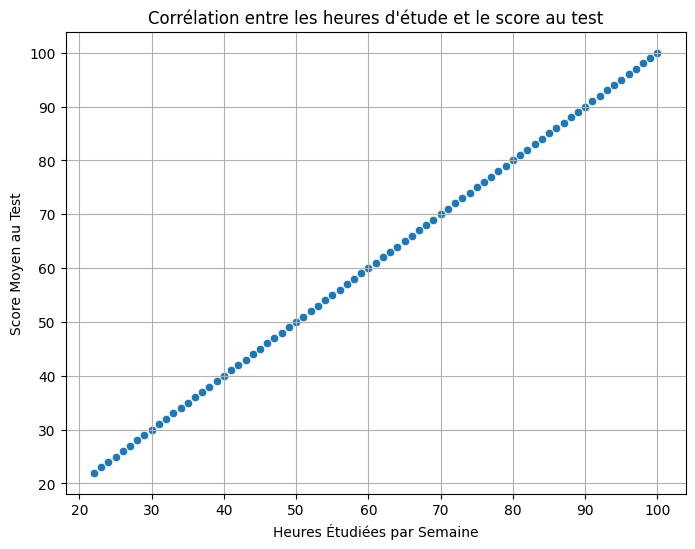

In [3]:
# Calculate the correlation coefficient
correlation = df['hours'].corr(df['score'])

print(f"Coefficient de corrélation entre les heures d'étude et le score au test : {correlation:.4f}")

# Interpret the correlation (optional)
if correlation > 0.7:
    print("Forte corrélation positive : Plus les étudiants étudient, plus leur score au test est élevé.")
elif correlation > 0.3:
    print("Corrélation positive modérée : Il y a une tendance positive entre les heures d'étude et le score au test.")
elif correlation > 0:
    print("Faible corrélation positive : Une légère tendance positive entre les heures d'étude et le score au test.")
elif correlation < -0.7:
    print("Forte corrélation négative : Plus les étudiants étudient, plus leur score au test est faible.")
elif correlation < -0.3:
    print("Corrélation négative modérée : Il y a une tendance négative entre les heures d'étude et le score au test.")
elif correlation < 0:
    print("Faible corrélation négative : Une légère tendance négative entre les heures d'étude et le score au test.")
else:
    print("Pas de corrélation significative : Il n'y a pas de relation linéaire claire entre les heures d'étude et le score au test.")

# You can also visualize the correlation using a scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='score', y='score', data=df)
plt.title('Corrélation entre les heures d\'étude et le score au test')
plt.xlabel('Heures Étudiées par Semaine')
plt.ylabel('Score Moyen au Test')
plt.grid(True)
plt.show()

In [19]:
import nbformat
import os

file_path = "evalytics.ipynb"

if os.path.getsize(file_path) > 0:  # Vérifie si le fichier n'est pas vide
    with open(file_path) as f:
        try:
            nb = nbformat.read(f, as_version=4)
            if 'widgets' in nb.metadata and 'state' not in nb.metadata['widgets']:
                nb.metadata['widgets']['state'] = {}
        except Exception as e:
            print(f"Erreur lors de la lecture du fichier : {e}")
else:
    print("Le fichier est vide ou invalide.")